# ***QUESTION 1***

---



---

### ***K-means clustering using Glass Classification Dataset***

### *Dataset Pre-processing*

In [ ]:
import pandas as pd

columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Label']
gc_data = pd.read_csv("/content/drive/MyDrive/PRML/Lab 6/glass.data", names=columns)

print(gc_data)

      Id       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Label
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0      1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0      1
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0      1
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0      1
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0      1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...    ...
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0      7
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0      7
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0      7
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0      7
213  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0      7

[214 rows x 11 columns]


In [ ]:
print(gc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Label   214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None


In [ ]:
print(gc_data.nunique())

Id       214
RI       178
Na       142
Mg        94
Al       118
Si       133
K         65
Ca       143
Ba        34
Fe        32
Label      6
dtype: int64


Dropping 'Id' column.

In [ ]:
gc_data = gc_data.drop('Id', axis=1)

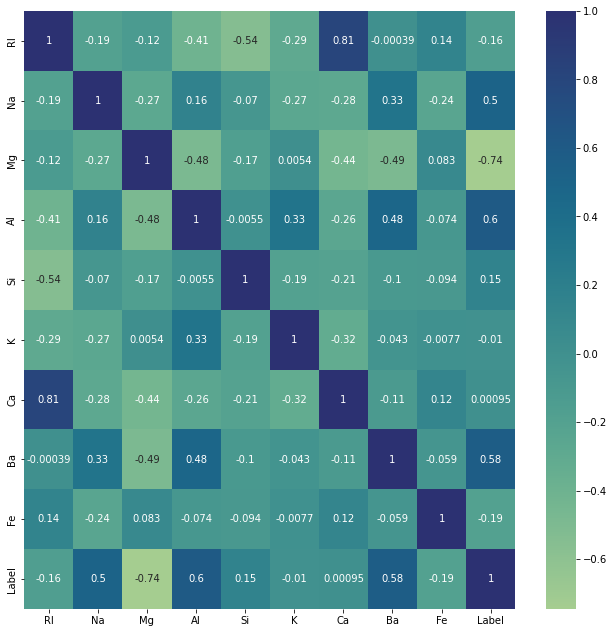

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11,11))
dataplot = sns.heatmap(gc_data.corr(), cmap='crest', annot=True)
plt.show()

In [ ]:
gc_y = gc_data.loc[:, 'Label']
gc_x = gc_data.drop('Label', axis=1)

### ***1. Build a k-means clustering algorithm (can use sklearn library) and implement using the value of k which you find suitable. Visualize this part by showing the clusters along with the centroids.***

In [ ]:
from sklearn.preprocessing import normalize

gc_x = gc_x.to_numpy()

# gc_x = normalize(gc_x, axis=0, norm='max')

k = 3


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


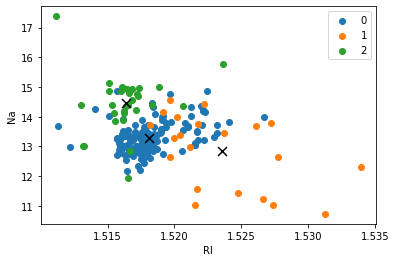

k = 4


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


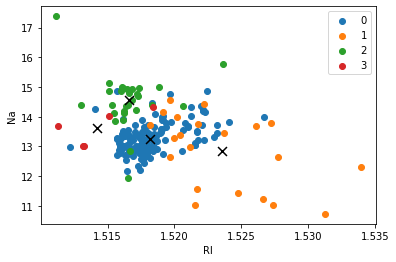

k = 5


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


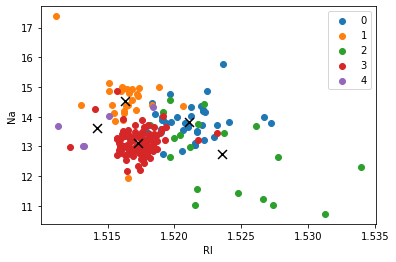

k = 6


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


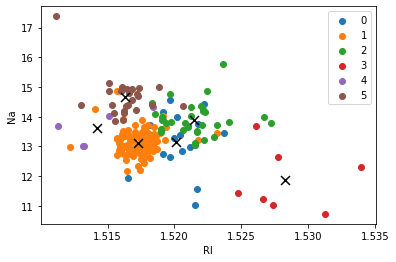

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

for i in range(3, 7):
    print('k =', i)
    clust = KMeans(n_clusters=i)
    label = clust.fit_predict(gc_x)
 
    # print(label)
    
    centroids = clust.cluster_centers_
    u_labels = np.unique(label)

    for i in u_labels:
        plt.scatter(gc_x[label == i , 0] , gc_x[label == i , 1] , label = i)
        plt.xlabel('RI')
        plt.ylabel('Na')
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k', marker='x')
    plt.legend()
    plt.show()

### ***2. Use different values of k and find the Silhouette score and then tell which value of k will be optimal and why?***

Silhouette score for k equals 3 is : 0.5822429516169841
Silhouette score for k equals 4 is : 0.5883002135099427
Silhouette score for k equals 5 is : 0.44724106710822126
Silhouette score for k equals 6 is : 0.4442811600335675
Silhouette score for k equals 7 is : 0.46261956793341563
Silhouette score for k equals 8 is : 0.4593875575160822
Silhouette score for k equals 9 is : 0.3035068817990471
Silhouette score for k equals 10 is : 0.3052625491257306
Silhouette score for k equals 11 is : 0.30599102623191693
Silhouette score for k equals 12 is : 0.2874500029816666
Silhouette score for k equals 13 is : 0.2899876487148208
Silhouette score for k equals 14 is : 0.2608941866282463
Silhouette score for k equals 15 is : 0.27403639141769137
Silhouette score for k equals 16 is : 0.29353889912636727
Silhouette score for k equals 17 is : 0.28778318794971786
Silhouette score for k equals 18 is : 0.28302168525754545
Silhouette score for k equals 19 is : 0.24858640607273988
Silhouette score for k equals 

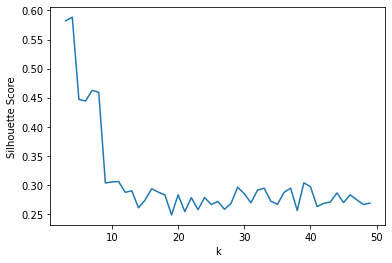

In [ ]:
from sklearn.metrics import silhouette_score

min_dic = {}
for i in range(3, 50):
    clust = KMeans(n_clusters=i, n_init=10)
    label = clust.fit_predict(gc_x)
    score = silhouette_score(gc_x, label)

    min_dic[i] = score
    print('Silhouette score for k equals', i, 'is :', score)

x = list(min_dic.keys())
y = list(min_dic.values())
plt.ylabel("Silhouette Score")
plt.xlabel("k")

plt.plot(x, y)
plt.show()

From silhouette score optimal number of k_clusters appears to be 4.

### ***3. There are few methods to find the optimal k value for k-means algorithm like the Elbow Method . Use the above method to find the optimal value of k.***

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 50)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(gc_x)
  
    distortions.append(sum(np.min(cdist(gc_x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / gc_x.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(gc_x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / gc_x.shape[0]
    mapping2[k] = kmeanModel.inertia_

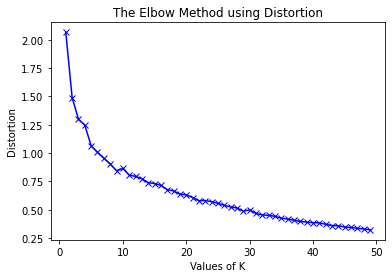

In [ ]:
# for key, val in mapping1.items():
#     print(f'{key} : {val}')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

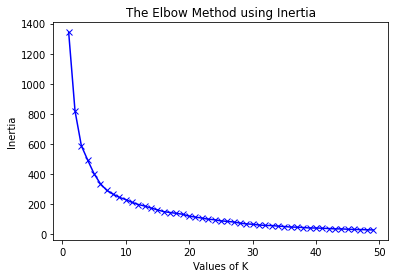

In [ ]:
# for key, val in mapping2.items():
#     print(f'{key} : {val}')

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

### ***4. Apply bagging with the KNN classifier as the base model. Show results with different values of K(=1,2,3). Comment on whether the accuracy changes or not after bagging with KNN along with the proper reason in terms of variance and bias.***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

for i in range(1, 4):
    print('K =', i, '...')
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(gc_x, gc_y)

    score = neigh.score(gc_x, gc_y)

    clf = BaggingClassifier(estimator = neigh, n_estimators=10, random_state=0).fit(gc_x, gc_y)
    score_bag = clf.score(gc_x, gc_y)

    print("Score KNN :", score)
    print("Score Bagging :", score_bag)

K = 1 ...
Score KNN : 1.0
Score Bagging : 0.9672897196261683
K = 2 ...
Score KNN : 0.8457943925233645
Score Bagging : 0.9252336448598131
K = 3 ...
Score KNN : 0.8364485981308412
Score Bagging : 0.8504672897196262


# ***QUESTION 2***

---



---

Using the [Olivetti Dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html).

In [ ]:
#Loading dataset.

from sklearn.datasets import fetch_olivetti_faces

data_2 = fetch_olivetti_faces()

x_train_2 = data_2['data']
y_train_2 = data_2['target']
images = data_2['images']

### ***1. Implement a k-means clustering algorithm from scratch.***
### ***2. Make sure that it should:***
***i) Be a class which will be able to store the cluster centers.***

***ii) Take a value of k from users to give k clusters.***

***iii) Be able to take initial cluster center points from the user as its initialization.***

***iv) Stop iterating when it converges (cluster centers are not changing anymore) or, a maximum iteration (given as max_iter by user) is reached.***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class k_means():
    def __init__(self, k_clusters=40, k_centers=None, max_iter=20):
        self.k_clusters = k_clusters
        self.k_centers = k_centers
        self.max_iter = max_iter

        self.clusters = {}
        self.centers = {}
        self.iter_clusters = {}

    def __get_labels(self):
        # print('Creating Labels...')
        # if self.labels.shape[0] == 0:
        labels = [i for i in range(1, self.k_clusters+1)]
        labels = np.array(labels)
        self.labels = labels

        return None

    def __initial_centers(self):
        # print('Initializing clusters...')
        if self.k_centers.shape == 0:
            centers = np.array([[0] for i in range(self.k_clusters)])

            mean_array = np.mean(self.x_train, axis=0)
            std_array = np.std(self.x_train, axis=0)

            for i in range(self.x_train.shape[1]):
                i_centers = np.random.normal(mean_array[i], std_array[i], size=(self.k_clusters, 1))
                # print(i_centers)
                centers = np.hstack((centers, i_centers))
            
            # print(centers)
            
            self.k_centers = centers[:, 1:]
        
        return None

    def __create_clust_center(self):
        for i in self.labels:
            self.clusters[i] = np.array([[0 for i in range(self.x_train.shape[1])]])
            self.centers[i] = self.k_centers[i-1]

    def __make_cluster(self):
        # print('Clustering the values...')
        for i in self.x_train:
            min_dist = 37627
            label = None
            for j in self.centers.keys():
                dist = np.linalg.norm(self.centers[j] - i)
                if dist < min_dist:
                    min_dist = dist
                    label = j
            
            # print(self.clusters)
            self.clusters[label] = np.vstack((self.clusters[label], i))
        
        new_clusters = {}
        for i in self.clusters.keys():
            self.clusters[i] = self.clusters[i][1:, :]
            new_clusters[i] = self.clusters[i][1:, :]

        return new_clusters

    def __update_centers(self):
        # print('Updating cluster centers...')
        new_centers = {}
        for i in self.clusters.keys():
            if self.clusters[i].shape[0] != 0:
                self.centers[i] = np.mean(self.clusters[i], axis=0)
                new_centers[i] = np.mean(self.clusters[i], axis=0)

        return new_centers

    def __is_converge(self, iter):
        # print('Checking convergence...')
        if (iter==1 or iter==2):
            return False
        else:
            # print(np.linalg.norm(self.iter_clusters[iter-1][1][1]-self.iter_clusters[iter-2][1][1]))
            if (self.iter_clusters[iter-1][0] == self.iter_clusters[iter-2][0]):
                # print('Converging...')
                # print(self.iter_clusters[iter-1][0], self.iter_clusters[iter-2][0])
                return True
            else:
                return False

    def __train(self):
        if self.max_iter!=None:
            iter = 1
            curr_clust = self.clusters
            curr_centers = self.centers
            print('Running iteration number...', iter)
            while ((self.__is_converge(iter)==False) and (iter<self.max_iter)):
                curr_clust = self.__make_cluster()
                curr_centers = self.__update_centers()
                self.iter_clusters[iter] = [curr_clust, curr_centers]
                iter += 1
                print('Running iteration number...', iter)
        else:
            iter = 1
            curr_clust = self.clusters
            curr_centers = self.centers
            print('Running iteration number...', iter)
            while (self.__is_converge(iter)==False):
                curr_clust = self.__make_cluster()
                curr_centers = self.__update_centers()
                self.iter_clusters[iter] = [curr_clust, curr_centers]
                iter += 1
                print('Running iteration number...', iter)
        self.iterations = iter

        return None

    def fit(self, x_train, labels=np.array([])):
        self.x_train = x_train
        self.labels = labels

        self.__get_labels()
        self.__initial_centers()
        # print(self.centers, self.k_centers)
        self.__create_clust_center()

        self.__train()

    def predict(self, x_pred):
        min_dist = 37627
        for i in self.centers.keys():
            dist = np.linalg.norm(self.centers[i] - x_pred)
            if dist < min_dist:
                min_dist = dist
                label = i
        
        return label

    def test(self, x_test):
        y_pred = []

        for i in x_test:
            y_pred.append(self.predict(i))

        return y_pred

    def visualize_center(self):
        centers = self.iter_clusters[self.max_iter-1][1]

        fig, axs = plt.subplots(5,8, sharex=True, sharey=True, figsize=(14, 7))
        # fig.suptitle('Vertically stacked subplots')
        fig.tight_layout(pad=0.5)
        k=1
        for i in range(5):
            for j in range(8):
                if k in centers.keys():
                    axs[i,j].imshow(centers[k].reshape(64, 64), cmap='gray')
                k+=1

        return None


### ***3. Train the k-means model on Olivetti data with k = 40 and 40 random 4096 dimensional points (in input range) as initializations. Report the number of points in each cluster.***

In [ ]:
centers = np.array([[0] for i in range(40)])

mean_array = np.mean(x_train_2, axis=0)
std_array = np.std(x_train_2, axis=0)

for i in range(4096):
    i_centers = np.random.normal(mean_array[i], std_array[i], size=(40, 1))
    # print(i_centers)
    centers = np.hstack((centers, i_centers))

centers = centers[:, 1:]

In [ ]:
kmeans = k_means(k_clusters=40, k_centers=centers)
kmeans.fit(x_train_2)
y_pred = kmeans.test(x_train_2)

Running iteration number... 1
Running iteration number... 2
Running iteration number... 3


<ipython-input-4-ba52e20a19dc>:84: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if (self.iter_clusters[iter-1][0] == self.iter_clusters[iter-2][0]):


Running iteration number... 4
Running iteration number... 5
Running iteration number... 6
Running iteration number... 7
Running iteration number... 8
Running iteration number... 9
Running iteration number... 10
Running iteration number... 11
Running iteration number... 12
Running iteration number... 13
Running iteration number... 14
Running iteration number... 15
Running iteration number... 16
Running iteration number... 17
Running iteration number... 18
Running iteration number... 19
Running iteration number... 20


In [ ]:
final_clusters = kmeans.iter_clusters[kmeans.max_iter-1][0]
print('Number of points in each cluster :')
for i in final_clusters.keys():
    print('Cluster', i, ':', kmeans.iter_clusters[kmeans.max_iter-1][0][i].shape[0])

Number of points in each cluster :
Cluster 1 : 0
Cluster 2 : 217
Cluster 3 : 404
Cluster 4 : 424
Cluster 5 : 0
Cluster 6 : 0
Cluster 7 : 0
Cluster 8 : 168
Cluster 9 : 0
Cluster 10 : 174
Cluster 11 : 121
Cluster 12 : 0
Cluster 13 : 204
Cluster 14 : 254
Cluster 15 : 0
Cluster 16 : 0
Cluster 17 : 513
Cluster 18 : 294
Cluster 19 : 385
Cluster 20 : 424
Cluster 21 : 54
Cluster 22 : 129
Cluster 23 : 363
Cluster 24 : 0
Cluster 25 : 0
Cluster 26 : 0
Cluster 27 : 160
Cluster 28 : 169
Cluster 29 : 509
Cluster 30 : 0
Cluster 31 : 0
Cluster 32 : 142
Cluster 33 : 69
Cluster 34 : 333
Cluster 35 : 729
Cluster 36 : 0
Cluster 37 : 296
Cluster 38 : 0
Cluster 39 : 314
Cluster 40 : 276


### ***4. Visualize the cluster centers of each cluster as 2-d images of all clusters.***

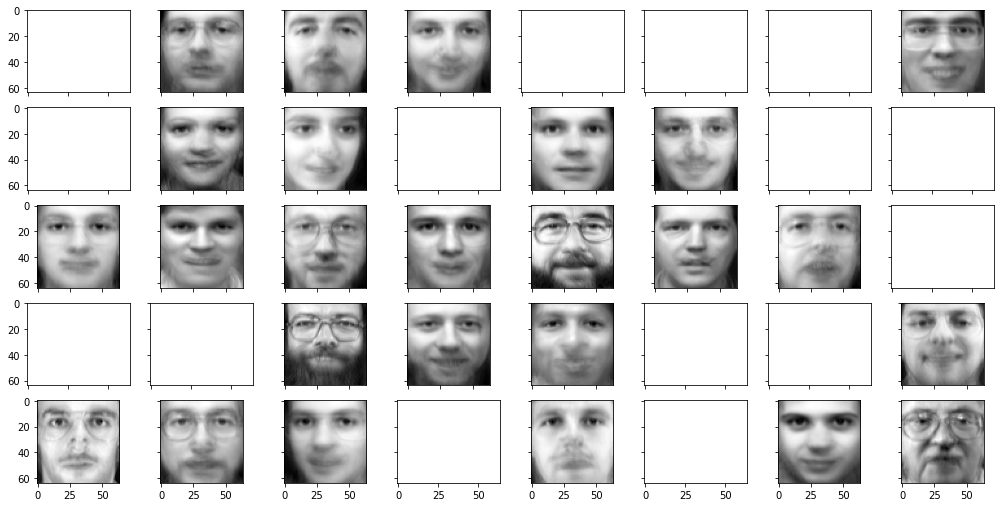

In [ ]:
kmeans.visualize_center()

### ***6. Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster and visualize the cluster centers.***

In [ ]:
centers_2 = np.array([0 for i in range(4096)])

for i in range(0, 400, 10):
    i_centers_2 = x_train_2[i]
    centers_2 = np.vstack((centers_2, [i_centers_2]))

centers_2 = centers_2[1:,:]

In [ ]:
kmeans_2 = k_means(k_clusters=40, k_centers=centers_2)
kmeans_2.fit(x_train_2)

Running iteration number... 1
Running iteration number... 2
Running iteration number... 3


<ipython-input-4-ba52e20a19dc>:84: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (self.iter_clusters[iter-1][0] == self.iter_clusters[iter-2][0]):


Running iteration number... 4
Running iteration number... 5
Running iteration number... 6
Running iteration number... 7
Running iteration number... 8
Running iteration number... 9
Running iteration number... 10
Running iteration number... 11
Running iteration number... 12
Running iteration number... 13
Running iteration number... 14
Running iteration number... 15
Running iteration number... 16
Running iteration number... 17
Running iteration number... 18
Running iteration number... 19
Running iteration number... 20


In [ ]:
final_clusters = kmeans_2.iter_clusters[kmeans_2.max_iter-1][0]
print('Number of points in each cluster :')
for i in final_clusters.keys():
    print('Cluster', i, ':', kmeans_2.iter_clusters[kmeans_2.max_iter-1][0][i].shape[0])

Number of points in each cluster :
Cluster 1 : 245
Cluster 2 : 172
Cluster 3 : 189
Cluster 4 : 187
Cluster 5 : 376
Cluster 6 : 168
Cluster 7 : 115
Cluster 8 : 74
Cluster 9 : 240
Cluster 10 : 38
Cluster 11 : 266
Cluster 12 : 95
Cluster 13 : 191
Cluster 14 : 152
Cluster 15 : 77
Cluster 16 : 19
Cluster 17 : 63
Cluster 18 : 274
Cluster 19 : 76
Cluster 20 : 57
Cluster 21 : 95
Cluster 22 : 171
Cluster 23 : 386
Cluster 24 : 303
Cluster 25 : 171
Cluster 26 : 132
Cluster 27 : 167
Cluster 28 : 170
Cluster 29 : 136
Cluster 30 : 334
Cluster 31 : 232
Cluster 32 : 168
Cluster 33 : 171
Cluster 34 : 171
Cluster 35 : 93
Cluster 36 : 19
Cluster 37 : 76
Cluster 38 : 426
Cluster 39 : 187
Cluster 40 : 158


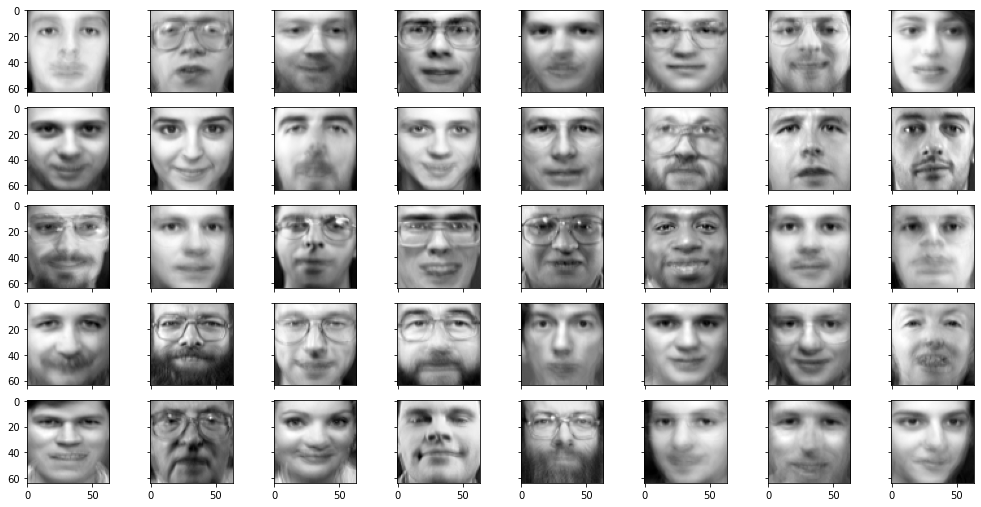

In [ ]:
kmeans_2.visualize_center()

### ***7. Visualize 10 images corresponding to each cluster.***

In [ ]:
# final_clusters = kmeans.iter_clusters[kmeans.max_iter-1][0]
# fig, axs = plt.subplots(40,10, sharex=True, sharey=True, figsize=(40, 10))
# print('10 Images from each cluster...:')
# for i in final_clusters.keys():
#     print('Cluster', i, '...')
#     fig.tight_layout(pad=0.5)
#     for j in range(10):
#         axs[i, j].imshow(final_clusters[i][j].reshape(64, 64), cmap='gray')

# ***QUESTION 3***

---

---

Applying DBSCAN on the [wholesale customers dataset](https://drive.google.com/file/d/1-UX5VWRoAVl0HG7taQPARFXFVztUxX3Q/view?usp=share_link) and makemoons dataset.



### ***1. Check out the dataset & preprocess the data so that the scale of each variable will be the same.***

In [ ]:
import numpy as np
import pandas as pd

data_3_1 = pd.read_csv('/content/drive/MyDrive/PRML/Lab 6/Wholesale customers data.csv')
data_3_1

In [ ]:
# Separating nominal and continuous features
y_3_1 = data_3_1[["Channel", "Region"]]
x_3_1 = data_3_1.drop(columns = ["Channel", "Region"])

In [ ]:
from sklearn import preprocessing

# Normalizing the feature columns
x_3_1_np = x_3_1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_3_1_np)
x_3_1[x_3_1.columns] = pd.DataFrame(x_scaled)

In [ ]:
x_3_1

### ***2. Find out the covariance between the pair of features with which you can best visualize the outliers. Also, visualize the same set of features.***

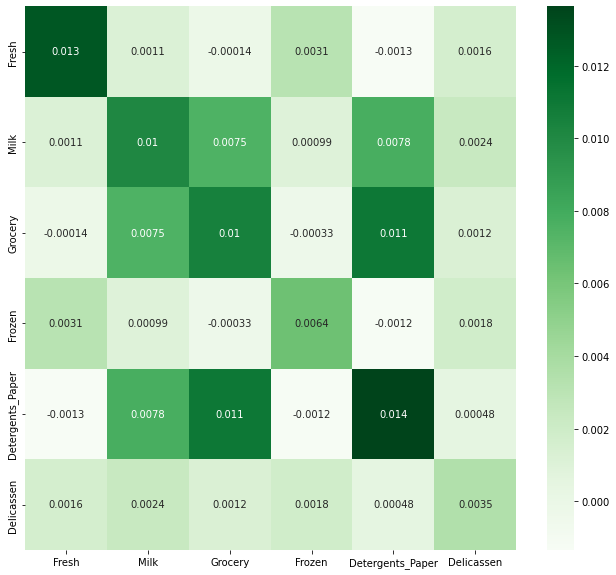

In [ ]:
plt.figure(figsize=(11, 10))
dataplot = sns.heatmap(x_3_1.cov(), cmap="Greens", annot=True)
plt.show()

From the heatmap, we can see that the maximum covariance is between 'Detergents_Paper' and 'Grocery'.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


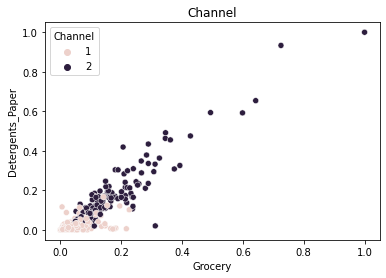

In [ ]:
# sns.scatterplot(x_3_1["Grocery"], x_3_1["Detergents_Paper"], hue=y_3_1['Region'])
sns.scatterplot(x_3_1["Grocery"], x_3_1["Detergents_Paper"], hue=y_3_1['Channel'])
plt.title('Channel')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


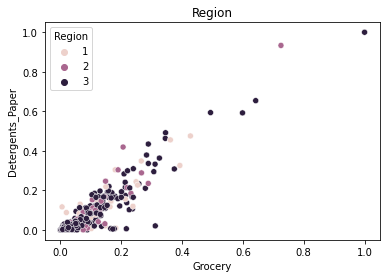

In [ ]:
sns.scatterplot(x_3_1["Grocery"], x_3_1["Detergents_Paper"], hue=y_3_1['Region'])
plt.title('Region')
plt.show()

### ***3. Apply DBSCAN to cluster the data points and visualize the same.***

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


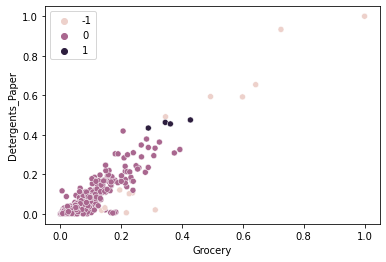

In [ ]:
dbscan1 = DBSCAN(eps=0.15, min_samples=2)
y_pred_3 = dbscan1.fit_predict(x_3_1)

sns.scatterplot(x_3_1['Grocery'], x_3_1['Detergents_Paper'], hue=y_pred_3)
plt.show()

### ***4. Apply K-means on the same dataset and compare the visualization with DBSCAN. Comment on what you observe with reason in the report.***

In [ ]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=2, n_init=10)
kmeans_3.fit(x_3_1)
y_pred_3_k = kmeans_3.predict(x_3_1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


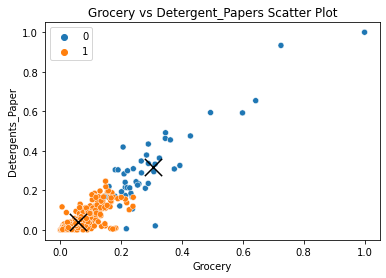

In [ ]:
centroids = kmeans_3.cluster_centers_

sns.scatterplot(x_3_1['Grocery'], x_3_1['Detergents_Paper'], hue=y_pred_3_k)

for center in centroids:
    plt.scatter(center[2], center[4], s=300, marker="x", facecolors='#000000')

plt.title('Grocery vs Detergent_Papers Scatter Plot')
plt.show()

### ***5. Use the make_moons function of sklearn to create a datasat of 2000 points. Add some noise to the plot, i.e., randomly add data points to the plot with a 20% probability. Apply DBSCAN and K Means to cluster them and finally compare the plots and comment on which one is better.***

In [ ]:
from sklearn.datasets import make_moons

data_x_mm, data_y_mm = make_moons(n_samples=2000, shuffle=True, noise=0.1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


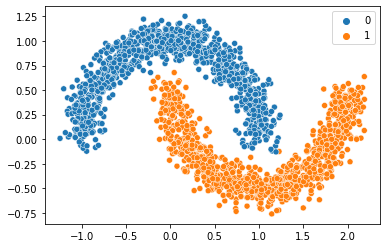

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data_x_mm[:,0], data_x_mm[:,1], hue=data_y_mm)
plt.show()

In [ ]:
x0_noise = np.random.uniform(min(data_x_mm[:,0]), max(data_x_mm[:,0]),(400,1))
x1_noise = np.random.uniform(min(data_x_mm[:,1]), max(data_x_mm[:,1]),(400,1))

x_noise_mm = np.concatenate((x0_noise, x1_noise), axis=1)

y_noise_mm = np.full((400, ), -1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


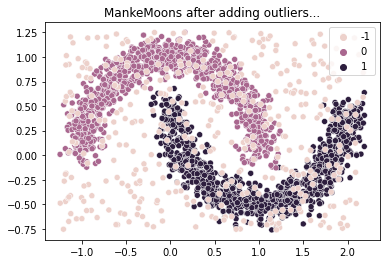

In [ ]:
data_x_mm = np.concatenate((data_x_mm, x_noise_mm), axis=0)
data_y_mm = np.concatenate((data_y_mm, y_noise_mm), axis=0)


sns.scatterplot(data_x_mm[:,0], data_x_mm[:,1], hue=data_y_mm)
plt.title('MankeMoons after adding outliers...')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


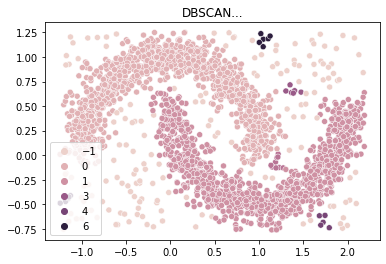

In [ ]:
dbscan_2 = clustering = DBSCAN(eps=0.09)
dbscan_2.fit(data_x_mm, data_y_mm)
labels_db2 = dbscan_2.labels_

sns.scatterplot(data_x_mm[:,0], data_x_mm[:,1], hue=labels_db2)
plt.title('DBSCAN...')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


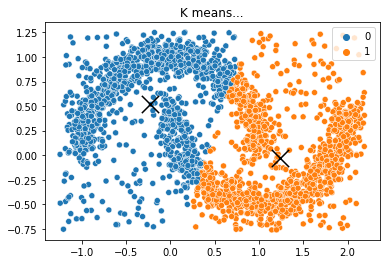

In [ ]:
kmeans_3_mm = KMeans(n_clusters=2, n_init=50)
kmeans_3_mm.fit(data_x_mm)
y_pred_3_mm = kmeans_3_mm.predict(data_x_mm)


centroids_mm = kmeans_3_mm.cluster_centers_

sns.scatterplot(data_x_mm[:,0], data_x_mm[:,1], hue=y_pred_3_mm)

for center in centroids_mm:
    plt.scatter(center[0], center[1], s=300, marker="x", facecolors='#000000')

plt.title('K means...')
plt.show()